# Guessing Income  Project
This project is a Data Science Bootcamp project; it is ment to build a modle to guess the income of each indivisual from a dataset contains demographic and financial information about selected people.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Exploring the Dataset

Here are the attributes information as they are described in [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult):

Attribute Information:

- **age:** continuous.
- **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt:** continuous.
- **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num:** continuous.
- **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex:** Female, Male.
- **capital-gain:** continuous.
- **capital-loss:** continuous.
- **hours-per-week:** continuous.
- **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **income:** >50K, <=50K.


In [2]:
data_df = pd.read_csv('../Dataset/adult.data')
data_df.head()

,age,workclass,fnlwgt,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data_df.shape

(32561, 15)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education_level  32561 non-null  object
 4   education-num    32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data_df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [7]:
data_df[data_df.duplicated()]

,age,workclass,fnlwgt,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [8]:
def check_unique(df):
    for i in df.columns:
        print(f'There are {len(df[i].unique())} unique {i}')

In [9]:
check_unique(data_df)

There are 73 unique age
There are 9 unique workclass
There are 21648 unique fnlwgt
There are 16 unique education_level
There are 16 unique education-num
There are 7 unique marital-status
There are 15 unique occupation
There are 6 unique relationship
There are 5 unique race
There are 2 unique sex
There are 119 unique capital-gain
There are 92 unique capital-loss
There are 94 unique hours-per-week
There are 42 unique native-country
There are 2 unique income


In [10]:
def find_question_mark(df):
    sums=0
    for i in df.columns:
        for j, jj in zip(df[i].value_counts().index, df[i].value_counts()):
            if (j == ' ?'):
                print(f'The column {i} has {jj} "?" values.')
                sums+=jj
    print(f'The total of "?" values is {sums}')

In [11]:
find_question_mark(data_df)

The column workclass has 1836 "?" values.
The column occupation has 1843 "?" values.
The column native-country has 583 "?" values.
The total of "?" values is 4262


In [12]:
def find_empty_space(df):
    space = ' '
    sums=0
    for i in df.columns:
        for j, jj in zip(df[i].value_counts().index, df[i].value_counts()):
            if(space in str(j)):
                sums+=jj
    print(f'The total of " " values is {sums/9} in each column of the str type columns.')
    
#Here we have only 9 columns with string type values

In [13]:
find_empty_space(data_df)

The total of " " values is 32561.0 in each column of the str type columns.


### Exoloring Summary

1. The dataset consists of 15 columns and 32561 rows.
2. We have 32561 non_null records in all of the 15 columns in the dataset. 
3. The data types are str and int data types. 
4. From the description of the dataset, I found the following:
    - The ages are between 90 and 17 years old.
    - The Capitl gain is between 0 and 99999. 
    - The Capital loss is between 0 and 4356. 
    - The Working hours per week are between 1 hour to 99 hours.
5. By checking the duplicated records, I found that there are no duplication as the rows overall are unique. 
6. The income information is classified as it follows:
    - \>50K yearlly income.
    - <=50K yearlly income.

### Cleaning Data Findings

**Over All:**
- **Finding 1:**
    - The columns have (-) to sperate between words.
- **Action:**
    - The columns will be renamed with (_) as a sperater between words. 
<br>
<br>

**Values issues Findings:**
- **Finding 1:**
    - The following columns has 4262 records as "?" value:
        - workclass
        - occupation
        - native-country
- **Action:**
    - Remove the records as we don't have the missing information to fill them. 
- **Finding 2:**
    - An extra space at the begaining of each string valuein the dataset.
- **Action:**
    - Remove the extra space.
- **Finding 3:**
    - Column "fnlwgt" has no meaning that may help in this project.
- **Action:**
    - Drop this column.

## Cleaning Data

**Fixing the column headers format**

In [14]:
#Taking copy from the original dataframe for the cleaning process.
cpy_data_df = data_df

In [15]:
def rename_columns(df):
    for i, idx in zip(df.columns, range(len(df.columns))):
        if('-' in i):
            i=i.replace('-','_')
            df.rename(columns={df.columns[idx]: i}, inplace=True)

In [16]:
rename_columns(cpy_data_df)

In [17]:
cpy_data_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_level', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

**Remove Spaces**

In [18]:
def remove_spaces(df):
    for i in df.columns:
        if(df[i].dtypes == 'object'):
            df[i]=df[i].str.lstrip().values

In [19]:
remove_spaces(cpy_data_df)

Checking if there are still empty spaces

In [20]:
find_empty_space(cpy_data_df)

The total of " " values is 0.0 in each column of the str type columns.


**Removing records contains "?"** <br>
? seems related to "not available or missing" data; because that we don't have the values to replace them with the right data, it is better to drop the rows to not effect the modle's output. 

In [21]:
cpy_data_df=cpy_data_df[cpy_data_df['workclass']!='?']
cpy_data_df=cpy_data_df[cpy_data_df['occupation']!='?']
cpy_data_df=cpy_data_df[cpy_data_df['native_country']!='?']

In [22]:
#def remove_question_mark(df):
#    cols = ['workclass', 'occupation', 'native_country']
#    for i in cols:
#        df=df[df[i]!='?']

In [23]:
#remove_question_mark(cpy_data_df)

Checking if there are still records with "?" values

In [24]:
def find_question_mark(df):
    sums=0
    for i in df.columns:
        for j, jj in zip(df[i].value_counts().index, df[i].value_counts()):
            if (j == '?'):
                print(f'The column {i} has {jj} "?" values.')
                sums+=jj
    print(f'The total of "?" values is {sums}')

In [25]:
find_question_mark(cpy_data_df)

The total of "?" values is 0


**Drop "fnlwgt" Column**

In [26]:
cpy_data_df.drop('fnlwgt',axis=1, inplace=True)
cpy_data_df=cpy_data_df.reset_index(drop=True)

In [27]:
cleaned_data_df=cpy_data_df

In [28]:
cleaned_data_df

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30159,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30160,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Visualization

To understand the data, I'm going to go through answering multiple quistions

In [29]:
cleaned_data_df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [30]:
cleaned_data_df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [31]:
cleaned_data_df['marital_status'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital_status, dtype: int64

In [32]:
cleaned_data_df['sex'].value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64

**What is the age average for each gender of the indevisuals with the income over 50K and at most 50K?**


In [33]:
cleaned_data_df.groupby(['income', 'sex'])['age'].mean()

income  sex   
<=50K   Female    36.231719
        Male      36.841390
>50K    Female    41.964928
        Male      44.305816
Name: age, dtype: float64

In [34]:
inc_sex_age=pd.pivot_table(cleaned_data_df.groupby(['income', 'sex'])['age'].mean().to_frame(), values='age', columns=['income', 'sex'])

In [35]:
inc_sex_age

income      <=50K                 >50K           
sex        Female      Male     Female       Male
age     36.231719  36.84139  41.964928  44.305816

<AxesSubplot:>

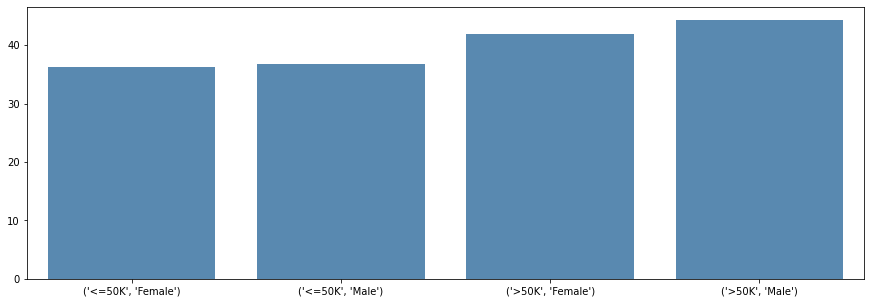

In [36]:
plt.subplots(figsize=(15,5))
sns.barplot(data=inc_sex_age, color='#4B8BBE')

In [37]:
grouped_workclass_income_df = cleaned_data_df.groupby(['income', 'sex'])['workclass'].value_counts().to_frame()

In [38]:
grouped_workclass_income_df=grouped_workclass_income_df.rename(columns={'workclass':'counts'})

In [39]:
pd.pivot_table(grouped_workclass_income_df, values='counts', columns=['income', 'sex', 'workclass'])


income          <=50K                                                  \
sex            Female                                                   
workclass Federal-gov Local-gov Private Self-emp-inc Self-emp-not-inc   
counts            254       672    6921           88              312   

income                                                         ...    >50K  \
sex                                    Male                    ...  Female   
workclass State-gov Without-pay Federal-gov Local-gov Private  ... Private   
counts          418           5         324       786   10489  ...     721   

income                                                                   \
sex                                                      Male             
workclass Self-emp-inc Self-emp-not-inc State-gov Federal-gov Local-gov   
counts              38               80        66         310       457   

income                                                     
sex                                                        
workclass Private Self-emp-inc Self-emp-not-inc State-gov  
counts       4155          562              634       278  

[1 rows x 26 columns]

<AxesSubplot:ylabel='income,sex,workclass'>

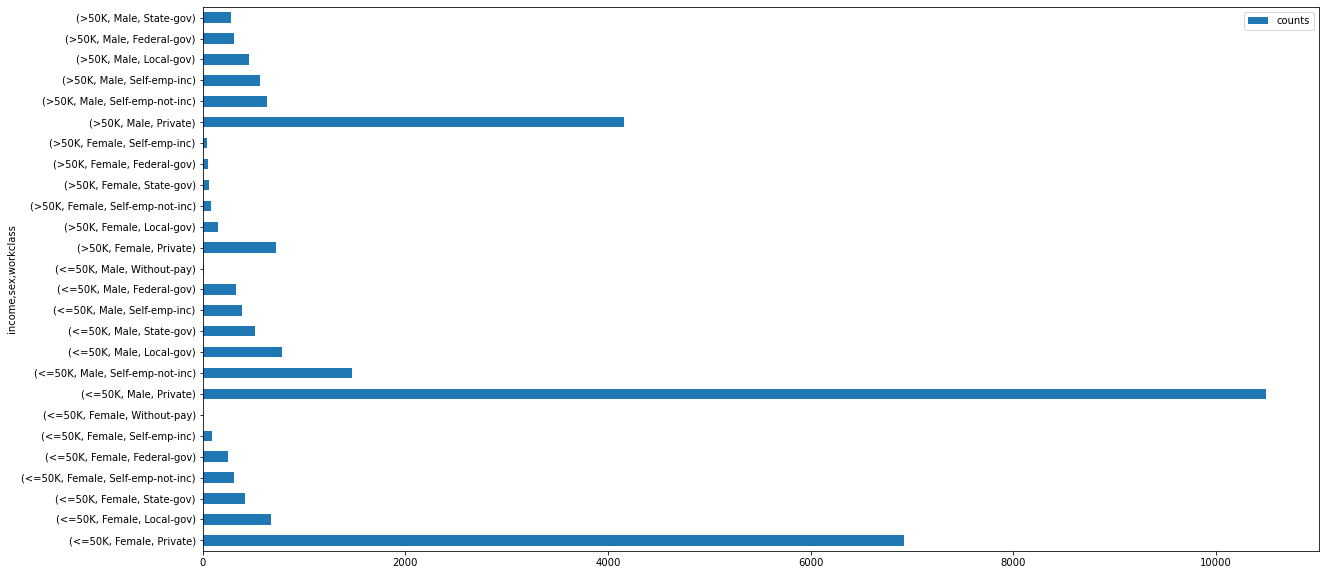

In [40]:
grouped_workclass_income_df.plot(kind='barh',figsize=(20,10))

<AxesSubplot:>

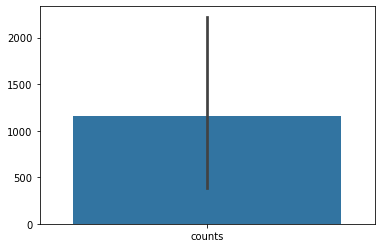

In [41]:
sns.barplot(data=grouped_workclass_income_df)

In [42]:
#cleaned_data_df[cleaned_data_df['income'] == "<=50K" & cleaned_data_df['sex'] == 'Male'] 
grouped_l50k_male=cleaned_data_df.query('income == "<=50K" & sex == "Male"').groupby(['income', 'sex'])['workclass'].value_counts()
grouped_l50k_female=cleaned_data_df.query('income == "<=50K" & sex == "Female"').groupby(['income', 'sex'])['workclass'].value_counts()
grouped_o50k_male=cleaned_data_df.query('income == ">50K" & sex == "Male"').groupby(['income', 'sex'])['workclass'].value_counts()
grouped_o50k_female=cleaned_data_df.query('income == ">50K" & sex == "Female"').groupby(['income', 'sex'])['workclass'].value_counts()

In [43]:
grouped_l50k_male.to_frame()

workclass
income sex  workclass                  
<=50K  Male Private               10489
            Self-emp-not-inc       1473
            Local-gov               786
            State-gov               517
            Self-emp-inc            386
            Federal-gov             324
            Without-pay               9

In [44]:
#grouped_l50k_male=grouped_l50k_male.rename(columns={'workclass':'counts'})
#grouped_l50k_female=grouped_l50k_female.rename(columns={'workclass':'counts'})
#grouped_o50k_male=grouped_o50k_male.rename(columns={'workclass':'counts'})
#grouped_o50k_female=grouped_o50k_female.rename(columns={'workclass':'counts'})

In [45]:
#grouped_l50k_male.to_frame()

In [46]:
to_model_df = cleaned_data_df

In [47]:
to_model_df['income']=to_model_df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [48]:
to_model_df

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30158,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30159,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30160,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [49]:
#final_df.iloc[:, final_df.columns == 'income']

In [50]:
final_df = pd.get_dummies(to_model_df)

In [51]:
final_df

,age,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,12,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,40,9,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30159,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30160,22,9,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:

X=final_df.iloc[:, final_df.columns != 'income']
y=final_df.iloc[:, final_df.columns == 'income']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

train_df=X_train
train_df['income']=y_train
train_df.head()

C:\Users\alihh\AppData\Local\Temp/ipykernel_2228/1552519381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['income']=y_train


,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income
18406,53,5,0,0,70,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
22563,49,13,0,0,70,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9267,28,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23824,60,6,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12799,53,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [53]:
test_df=X_test
test_df['income']=y_test
test_df.head()

C:\Users\alihh\AppData\Local\Temp/ipykernel_2228/2604230159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['income']=y_test


,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income
217,28,15,0,0,55,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
24913,41,9,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
17780,53,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
12484,31,9,0,0,45,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8890,34,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
lg_reg=LogisticRegression()
lg_reg.fit(X_train, y_train)

C:\Users\alihh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alihh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
lg_reg.score(X_train,y_train)

0.9447138298313233

In [56]:
y_pred=lg_reg.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [57]:
lg_reg.score(X_test,y_test)

0.9418199900546992

In [58]:
sqrt(mean_squared_error(y_test, y_pred))

0.24120532735679956

In [59]:
lg_reg.coef_

array([[-3.90764609e-02,  5.88278723e-02,  3.59794572e-04,
         7.00896417e-04, -2.83762578e-02,  8.44136618e-02,
         3.01753552e-02, -1.12133793e+00,  1.85477456e-01,
        -1.92303702e-02, -1.77543314e-03, -4.06480673e-03,
        -1.44857544e-01, -2.11106859e-01, -6.29154594e-02,
        -3.42022770e-02, -6.00851129e-02, -1.12316373e-01,
        -8.79457155e-02, -1.20702423e-02, -9.09533671e-03,
         5.38643336e-01,  1.28997748e-01, -8.26264622e-01,
         3.28570692e-01, -1.30919266e-02,  1.52154125e-01,
        -4.20756497e-01, -4.93999110e-01,  3.93030036e-03,
         1.75170845e+00, -5.82649189e-02, -1.79815882e+00,
        -1.38850030e-01, -1.12707942e-01, -4.01200055e-01,
        -1.52065551e-03, -1.66067385e-01,  5.70701000e-01,
        -1.31334549e-01, -2.34845129e-01, -2.41977940e-01,
        -5.90227682e-01, -3.02812959e-02,  4.72116795e-01,
         2.88627637e-02, -5.19627254e-02,  2.32360569e-02,
        -9.18412629e-02,  1.55872761e+00, -9.81324192e-0

In [60]:
lg_reg.intercept_

array([-0.84637254])

In [62]:
skewed = ['capital_gain', 'capital_loss']
to_model_df = pd.DataFrame(data = to_model_df)
to_model_df[skewed] = to_model_df[skewed].apply(lambda x: np.log(x + 1))

In [63]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

to_model_df = pd.DataFrame(data = to_model_df)
to_model_df[numerical] = scaler.fit_transform(to_model_df[numerical])

In [64]:
to_model_df

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States,0
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,0
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,0
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,0
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.136986,Private,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,0
30158,0.315068,Private,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,1
30159,0.561644,Private,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,0
30160,0.068493,Private,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,0


In [77]:
final2_df=to_model_df

In [78]:
final2_df = pd.get_dummies(final2_df)
final2_df

,age,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.136986,0.733333,0.000000,0.0,0.377551,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,0.315068,0.533333,0.000000,0.0,0.397959,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30159,0.561644,0.533333,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30160,0.068493,0.533333,0.000000,0.0,0.193878,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
X=final2_df.iloc[:, final2_df.columns != 'income']
y=final2_df.iloc[:, final2_df.columns == 'income']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

train_df=X_train
train_df['income']=y_train
train_df.head()

C:\Users\alihh\AppData\Local\Temp/ipykernel_2228/2467618869.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['income']=y_train


,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income
18406,0.493151,0.266667,0.0,0.0,0.704082,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
22563,0.438356,0.800000,0.0,0.0,0.704082,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9267,0.150685,0.600000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23824,0.589041,0.333333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12799,0.493151,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [80]:
test_df=X_test
test_df['income']=y_test
test_df.head()

C:\Users\alihh\AppData\Local\Temp/ipykernel_2228/2604230159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['income']=y_test


,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income
217,0.150685,0.933333,0.0,0.0,0.551020,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
24913,0.328767,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
17780,0.493151,0.533333,0.0,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
12484,0.191781,0.533333,0.0,0.0,0.448980,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8890,0.232877,0.800000,0.0,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [81]:
lg_reg=LogisticRegression()
lg_reg.fit(X_train, y_train)

C:\Users\alihh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [82]:
lg_reg.score(X_train,y_train)

1.0

In [65]:
final3_df = to_model_df[['age', 'capital_loss', 'capital_gain', 'hours_per_week', 'education_level', 'income']]

In [66]:
final3_df = pd.get_dummies(final3_df)
final3_df

,age,capital_loss,capital_gain,hours_per_week,income,education_level_10th,education_level_11th,education_level_12th,education_level_1st-4th,education_level_5th-6th,...,education_level_9th,education_level_Assoc-acdm,education_level_Assoc-voc,education_level_Bachelors,education_level_Doctorate,education_level_HS-grad,education_level_Masters,education_level_Preschool,education_level_Prof-school,education_level_Some-college
0,0.301370,0.0,0.667492,0.397959,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.452055,0.0,0.000000,0.122449,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.287671,0.0,0.000000,0.397959,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.493151,0.0,0.000000,0.397959,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.150685,0.0,0.000000,0.397959,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.136986,0.0,0.000000,0.377551,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
30158,0.315068,0.0,0.000000,0.397959,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30159,0.561644,0.0,0.000000,0.397959,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30160,0.068493,0.0,0.000000,0.193878,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
X=final3_df.iloc[:, final3_df.columns != 'income']
y=final3_df.iloc[:, final3_df.columns == 'income']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

train_df=X_train
train_df['income']=y_train
train_df.head()

C:\Users\alihh\AppData\Local\Temp/ipykernel_2228/2737541395.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['income']=y_train


,age,capital_loss,capital_gain,hours_per_week,education_level_10th,education_level_11th,education_level_12th,education_level_1st-4th,education_level_5th-6th,education_level_7th-8th,...,education_level_Assoc-acdm,education_level_Assoc-voc,education_level_Bachelors,education_level_Doctorate,education_level_HS-grad,education_level_Masters,education_level_Preschool,education_level_Prof-school,education_level_Some-college,income
18406,0.493151,0.0,0.0,0.704082,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22563,0.438356,0.0,0.0,0.704082,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9267,0.150685,0.0,0.0,0.397959,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23824,0.589041,0.0,0.0,0.397959,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12799,0.493151,0.0,0.0,0.397959,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [68]:
test_df=X_test
test_df['income']=y_test
test_df.head()

C:\Users\alihh\AppData\Local\Temp/ipykernel_2228/2604230159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['income']=y_test


,age,capital_loss,capital_gain,hours_per_week,education_level_10th,education_level_11th,education_level_12th,education_level_1st-4th,education_level_5th-6th,education_level_7th-8th,...,education_level_Assoc-acdm,education_level_Assoc-voc,education_level_Bachelors,education_level_Doctorate,education_level_HS-grad,education_level_Masters,education_level_Preschool,education_level_Prof-school,education_level_Some-college,income
217,0.150685,0.0,0.0,0.551020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
24913,0.328767,0.0,0.0,0.397959,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17780,0.493151,0.0,0.0,0.500000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
12484,0.191781,0.0,0.0,0.448980,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8890,0.232877,0.0,0.0,0.397959,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
lg_reg=LogisticRegression()
lg_reg.fit(X_train, y_train)

C:\Users\alihh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [70]:
lg_reg.score(X_train,y_train)

1.0

In [71]:
y_pred=lg_reg.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [72]:
lg_reg.score(X_test,y_test)

1.0

In [73]:
sqrt(mean_squared_error(y_test, y_pred))

0.0

In [74]:
#lg_reg.fit(X_train_scaled, y_train)

In [75]:
y_pred=lg_reg.predict(X_train)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)